In [4]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [39]:
ARQ_VENDAS = r'D:\#Mega\Jeferson - Dev\02 - Linguagens\Python\Analise_Producao_Geral\files\dados_vendas.csv'

In [53]:
df = pd.read_csv(ARQ_VENDAS)

In [54]:
df

,Data,Produto,Cliente,Quantidade_vendida,Preco_unitario,Valor_total
0,2020-01-01,Caneta Azul,Cliente Tau,21,23.95,502.95
1,2020-01-01,Caneta Azul,Cliente Alfa,13,20.08,261.04
2,2020-01-01,Caneta Azul,Cliente Delta,24,19.42,466.08
3,2020-01-01,Caneta Amarela,Cliente Alfa,49,21.44,1050.56
4,2020-01-01,Caneta Verde,Cliente Tau,16,7.41,118.56
...,...,...,...,...,...,...
17810,2024-12-29,Caneta Azul,Cliente Tau,80,20.29,1623.20
17811,2024-12-29,Caneta Amarela,Cliente Delta,32,20.04,641.28
17812,2024-12-29,Caneta Verde,Cliente Tau,35,7.32,256.20
17813,2024-12-29,Caneta Preta,Cliente Kappa,33,13.74,453.42


In [55]:
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

In [56]:
mes = 5
ano = 2024

In [64]:
df_filtrado = df[(df['Data'].dt.year == ano) & (df['Data'].dt.month == mes)]

In [58]:
meses_portugues = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}


In [12]:
df_filtrado

,Data,Produto,Cliente,Quantidade_vendida,Preco_unitario,Valor_total
14226,2024-01-01,Caneta Azul,Cliente Lambda,46,4.69,215.74
14227,2024-01-01,Caneta Azul,Cliente Kappa,18,4.15,74.70
14228,2024-01-01,Caneta Azul,Cliente Kappa,19,4.94,93.86
14229,2024-01-01,Caneta Amarela,Cliente Lambda,37,3.66,135.42
14230,2024-01-01,Caneta Amarela,Cliente Delta,7,4.43,31.01
...,...,...,...,...,...,...
17810,2024-12-29,Caneta Azul,Cliente Tau,80,4.06,324.80
17811,2024-12-29,Caneta Amarela,Cliente Delta,32,4.01,128.32
17812,2024-12-29,Caneta Verde,Cliente Tau,35,1.47,51.45
17813,2024-12-29,Caneta Preta,Cliente Kappa,33,2.75,90.75


## Receita Mensal / ano

In [13]:
df_top_produtos = df_filtrado.groupby('Produto')['Valor_total'].sum().reset_index()
df_top_produtos = df_top_produtos.sort_values('Valor_total', ascending=True)

In [14]:
df_top_produtos

,Produto,Valor_total
3,Caneta Verde,30496.47
0,Caneta Amarela,64889.91
2,Caneta Preta,65695.53
1,Caneta Azul,96036.91


In [15]:
df_filtrado['Mes_abreviado'] = df_filtrado['Data'].dt.month.map(meses_portugues)

C:\Users\mp_br\AppData\Local\Temp\ipykernel_6748\4195838422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Mes_abreviado'] = df_filtrado['Data'].dt.month.map(meses_portugues)


In [16]:
df_receita_mensal = df_filtrado.groupby('Mes_abreviado')['Valor_total'].sum().reset_index()

In [17]:
df_receita_mensal

,Mes_abreviado,Valor_total
0,Abr,25971.99
1,Ago,17714.07
2,Dez,20536.97
3,Fev,21985.77
4,Jan,24162.88
5,Jul,20834.07
6,Jun,22104.75
7,Mai,24979.47
8,Mar,26635.14
9,Nov,17885.46


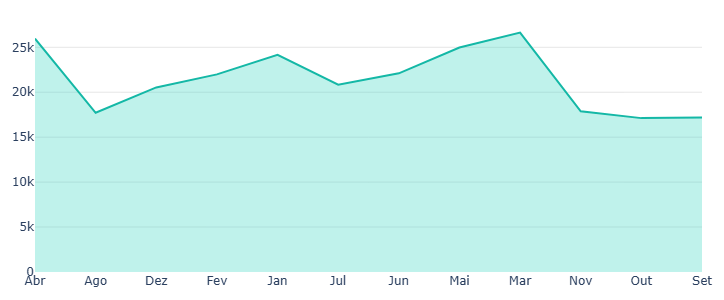

In [42]:
fig_receita = go.Figure()
fig_receita.add_trace(go.Scatter(
    x=df_receita_mensal['Mes_abreviado'],
    y=df_receita_mensal['Valor_total'],
    fill='tozeroy',
    fillcolor='rgba(45, 212, 191, 0.3)',
    line=dict(color='rgb(20, 184, 166)', width=2),
    mode='lines'   

    
))

fig_receita.update_layout(
    height=300,
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='rgba(128,128,128,0.2)'),
    hovermode='x unified'
)


#st.plotly_chart(fig_receita, use_container_width=True)

## Top 5 Clientes por Receita

In [23]:
df

,Data,Produto,Cliente,Quantidade_vendida,Preco_unitario,Valor_total
0,2020-01-01,Caneta Azul,Cliente Tau,21,4.79,100.59
1,2020-01-01,Caneta Azul,Cliente Alfa,13,4.02,52.26
2,2020-01-01,Caneta Azul,Cliente Delta,24,3.89,93.36
3,2020-01-01,Caneta Amarela,Cliente Alfa,49,4.29,210.21
4,2020-01-01,Caneta Verde,Cliente Tau,16,1.48,23.68
...,...,...,...,...,...,...
17810,2024-12-29,Caneta Azul,Cliente Tau,80,4.06,324.80
17811,2024-12-29,Caneta Amarela,Cliente Delta,32,4.01,128.32
17812,2024-12-29,Caneta Verde,Cliente Tau,35,1.47,51.45
17813,2024-12-29,Caneta Preta,Cliente Kappa,33,2.75,90.75


In [43]:
df_top5_clientes = df.groupby('Cliente')['Valor_total'].sum().reset_index()

In [44]:
df_top5_clientes =  df_top5_clientes.sort_values('Valor_total', ascending=False)

In [45]:
df_top5_clientes.head(5)

,Cliente,Valor_total
2,Cliente Kappa,336464.58
1,Cliente Delta,329839.68
0,Cliente Alfa,232364.67
4,Cliente Tau,223864.50
3,Cliente Lambda,166756.32


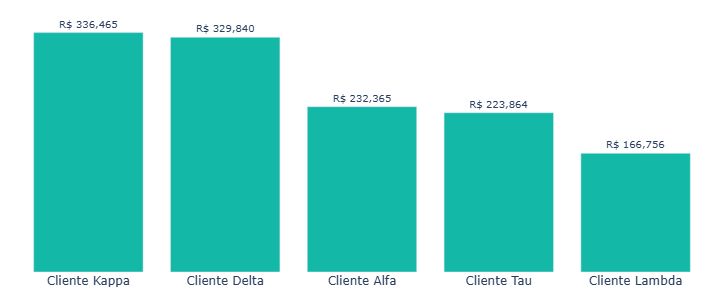

In [38]:

fig_clientes = go.Figure()
fig_clientes.add_trace(go.Bar(
    x=df_top5_clientes['Cliente'],
    y=df_top5_clientes['Valor_total'],
    marker=dict(color='rgb(20, 184, 166)'),
    text=[f'R$ {v:,.0f}' for v in df_top5_clientes['Valor_total']],
    textposition='outside',
    textfont=dict(size=10)
))

fig_clientes.update_layout(
    height=300,
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False, showticklabels=False),
    showlegend=False
)

## Vendas mensais e anuais / mes e ano

In [49]:
df.head(4)

,Data,Produto,Cliente,Quantidade_vendida,Preco_unitario,Valor_total
0,2020-01-01,Caneta Azul,Cliente Tau,21,4.79,100.59
1,2020-01-01,Caneta Azul,Cliente Alfa,13,4.02,52.26
2,2020-01-01,Caneta Azul,Cliente Delta,24,3.89,93.36
3,2020-01-01,Caneta Amarela,Cliente Alfa,49,4.29,210.21


In [ ]:
df_vendas_mes['dia'] = df['Data'].dt.day
df_vendas_mes['dia'] = df['Data'].dt.day

In [75]:
df_vendas_mes = df[(df['Data'].dt.year == 2024) & (df['Data'].dt.month == 2)]
df_vendas_mes =  df_vendas_mes.groupby('Data')['Valor_total'].sum().reset_index()

In [76]:
df_vendas_mes

,Data,Valor_total
0,2024-02-01,3152.48
1,2024-02-02,4023.64
2,2024-02-03,2769.09
3,2024-02-04,5005.84
4,2024-02-05,2985.35
5,2024-02-06,2023.92
6,2024-02-07,3489.09
7,2024-02-08,3981.49
8,2024-02-09,2880.85
9,2024-02-10,3644.81


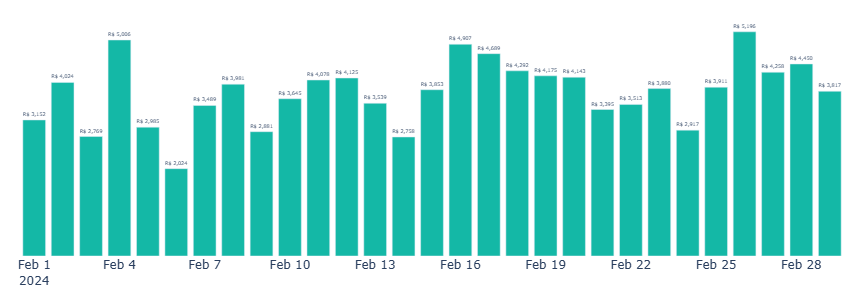

In [77]:

fig_clientes = go.Figure()
fig_clientes.add_trace(go.Bar(
    x=df_vendas_mes['Data'],
    y=df_vendas_mes['Valor_total'],
    marker=dict(color='rgb(20, 184, 166)'),
    text=[f'R$ {v:,.0f}' for v in df_vendas_mes['Valor_total']],
    textposition='outside',
    textfont=dict(size=10)
))

fig_clientes.update_layout(
    height=300,
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False, showticklabels=False),
    showlegend=False
)